In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers


In [2]:
#PREPROCESSING
#Get images 

training_data_path = 'images/train'
testing_data_path = 'images/test'
validation_data_path = 'images/validation'

In [3]:
# fit images to the same size

image_height = 200
image_width = 200

In [4]:
# function to convert path to greyscaled dataset
def dataset_dir(data_path):
    return tf.keras.utils.image_dataset_from_directory(
        data_path,
        batch_size= 4,
        shuffle=True,
        color_mode= 'rgb',
        image_size= (image_width, image_height),
        validation_split= False)

        

In [5]:

training_data = dataset_dir(training_data_path)

Found 226 files belonging to 3 classes.


In [6]:
categories = training_data.class_names
#print(categories)

In [7]:
testing_data = dataset_dir(testing_data_path)


Found 30 files belonging to 3 classes.


In [8]:
validation_data = dataset_dir(validation_data_path)


Found 30 files belonging to 3 classes.


2024-08-01 15:51:20.455662: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


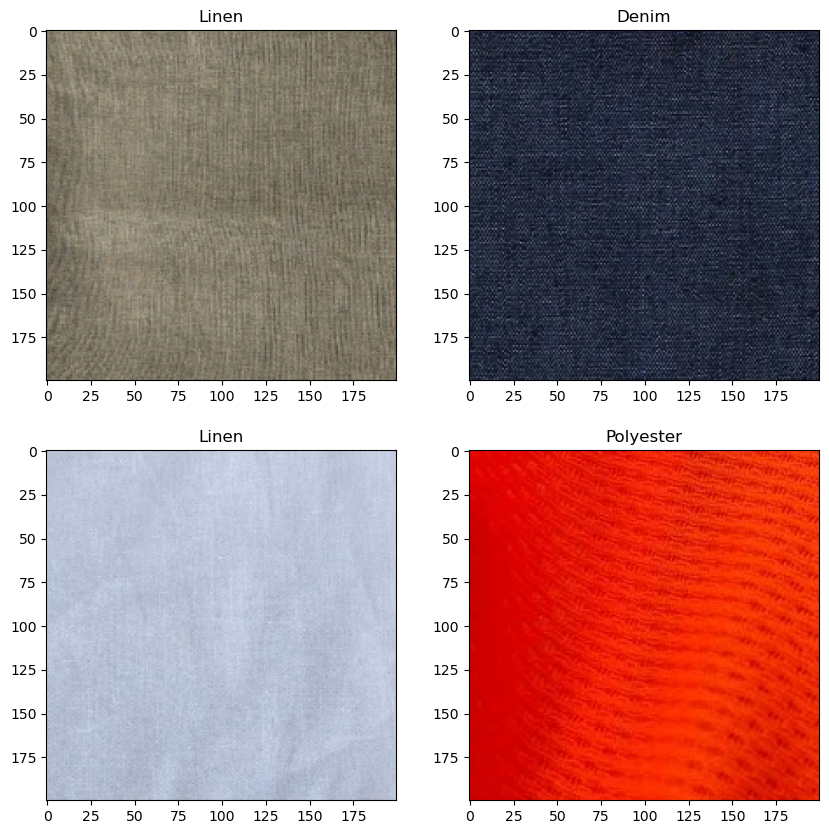

In [9]:
#Show image of each type

plt.figure(figsize=(10,10))
for training_data_point in training_data.take(1):
    images, cat = training_data_point
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(categories[cat[i]])


In [10]:
# CREATING THE MODEL

from tensorflow.keras.models import Sequential


#standard sequntial model from tensorflow keras documentation
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation= 'sigmoid')
    
])

In [11]:
model.compile(optimizer= 'rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Fit the model with n epochs

epochs=40
history = model.fit(
    training_data, 
    validation_data=validation_data,
    epochs=epochs
)

Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3812 - loss: 2.4356 - val_accuracy: 0.3333 - val_loss: 1.1363
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4709 - loss: 1.0614 - val_accuracy: 0.6333 - val_loss: 0.9501
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6506 - loss: 0.8774 - val_accuracy: 0.4000 - val_loss: 2.1933
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6186 - loss: 0.9576 - val_accuracy: 0.6000 - val_loss: 1.1725
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6754 - loss: 0.8057 - val_accuracy: 0.7667 - val_loss: 0.6570
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6578 - loss: 0.8357 - val_accuracy: 0.7333 - val_loss: 0.6968
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7125 - loss: 0.6812 - val_accuracy: 0.7333 - val_loss: 0.7316
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7184 - loss: 0.7040 - val_accuracy: 0.7667 - v

In [13]:
model.evaluate(testing_data)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8097 - loss: 0.5645


[0.6321364045143127, 0.7333333492279053]